In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_excel("/content/drive/MyDrive/DE/ML/Datasets/Restaurant.xlsx")
data.head()

,DATE,TIME,INVOICE_NO,ITEM,QUANTITY,RATE,SUB_TOTAL,AMOUNT,DAY
0,01.10.23,23.40,174,PAROTTA,4.0,18.0,72.0,NaN,1
1,01.10.23,23.40,174,OMLETTE,2.0,18.0,36.0,108.0,1
2,01.10.23,23.36,173,DOSA,3.0,20.0,60.0,NaN,1
3,01.10.23,23.36,173,PAROTTA,2.0,18.0,36.0,NaN,1
4,01.10.23,23.36,173,KALAKI,1.0,15.0,15.0,111.0,1


In [13]:
# Sales average of a date
date = data[data['DATE'] == "01.10.23"]
print(date['AMOUNT'].mean())

184.2280701754386


In [16]:
# Total Amount of an Invoice
invoice = data[data['INVOICE_NO'] == 117]
invoice['AMOUNT'].sum()

np.float64(625.0)

In [58]:
# Sales by items
items = data.groupby('ITEM')['SUB_TOTAL'].sum().sort_values(ascending = False).head(5)
print(items)

ITEM
PAROTTA             5346.0
CHICKEN BIRIYANI    5060.0
MUTTON BIRIYANI     2550.0
PLAIN BIRIYANI      2240.0
DOSA                2160.0
Name: SUB_TOTAL, dtype: float64


<Axes: xlabel='ITEM', ylabel='SUB_TOTAL'>

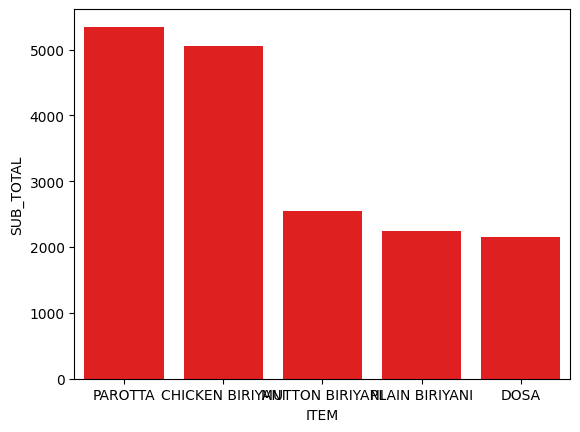

In [34]:
sns.barplot(items, color = 'red')

In [59]:
# Max Quantity by items
items = data.groupby('ITEM')['QUANTITY'].sum().sort_values(ascending = False).head(5)
print(items)

ITEM
PAROTTA             297.0
DOSA                108.0
CHAPPATHI            50.0
KALAKI               49.0
CHICKEN BIRIYANI     46.0
Name: QUANTITY, dtype: float64


<Axes: xlabel='ITEM', ylabel='QUANTITY'>

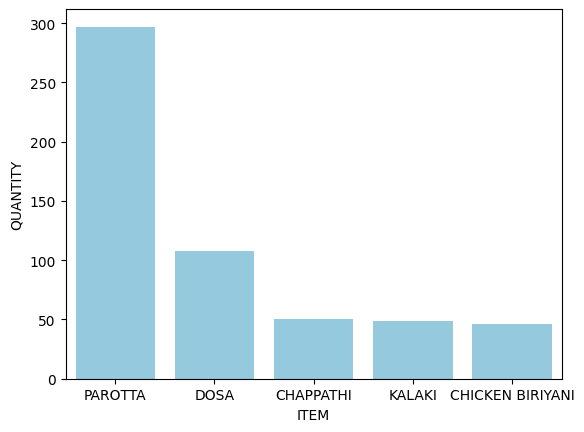

In [43]:
sns.barplot(items, color = 'skyblue')

In [56]:
# Least Quantity of items by date
leastQuantityByDate = data[data['DATE'] == '2.10.2023'].groupby('ITEM')['QUANTITY'].sum().sort_values()
print(leastQuantityByDate)

ITEM
CHICKEN BIRIYANI      1.0
CHICKEN FICE RICE     1.0
EGG BIRIYANI          1.0
EGG PAROTTA           1.0
GOBI 65               1.0
PAROTTA              12.0
Name: QUANTITY, dtype: float64


<Axes: xlabel='ITEM', ylabel='QUANTITY'>

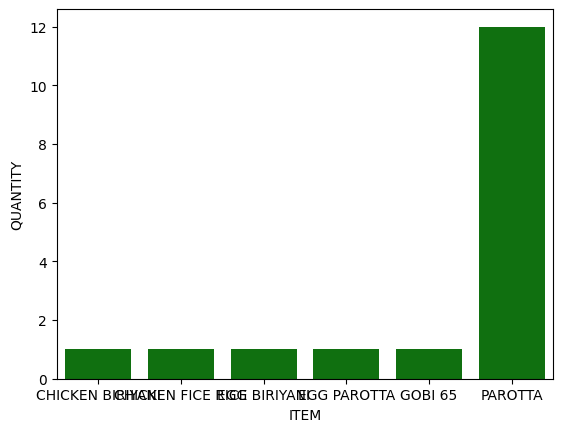

In [57]:
sns.barplot(leastQuantityByDate, color = 'green')

In [61]:
# Invoice Number with high amount
highInvoice = data.groupby('INVOICE_NO')['AMOUNT'].sum().sort_values(ascending = False).head(1)
print(highInvoice)

INVOICE_NO
63    941.0
Name: AMOUNT, dtype: float64


In [156]:
# Count within time
withinTime = data[(data['TIME'] > 18) & (data['TIME'] < 21)]
withinTime = withinTime[withinTime['ITEM'] == 'PAROTTA']['QUANTITY'].sum()
print(withinTime)

61.0


--------------------------------------------------------------------

In [80]:
df = pd.read_csv("/content/drive/MyDrive/DE/ML/Datasets/Data.csv")
df.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN


In [85]:
# Date with highest Average sales
hData = df.groupby('Date')['Final Total'].mean().sort_values(ascending = False).head(1)
print(hData)

Date
2023-07-19    319.837857
Name: Final Total, dtype: float64


In [118]:
# Number of Invoices
invoiceCount = df.groupby('Invoice No.').count()
print(len(invoiceCount))
df['Invoice No.'].nunique()

2199


2199

In [122]:
# Most item sold in September
september = df[(df['Date'] >= '2023-09-01') & (df['Date'] <= '2023-09-30')]
items = september.groupby('Item Name')['Qty.'].sum().sort_values(ascending = False).head(1)
print(items)

Item Name
Chicken Biriyani With Raitha And Gravy    268.0
Name: Qty., dtype: float64


Category
NON VEG STARTERS FISH    49.0
NON VEG STARTERS EGG     53.0
Veg Soup                 53.0
Name: Qty., dtype: float64


<Axes: xlabel='Category', ylabel='Qty.'>

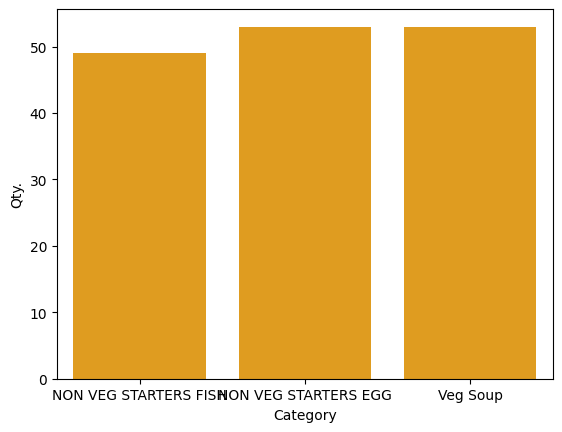

In [143]:
# Sold less in July
july = df[(df['Date'] >= '2023-07-01') & (df['Date'] <= '2023-07-31')]
categories = july.groupby('Category')['Qty.'].sum().sort_values()
print(categories.head(3))
sns.barplot(categories.head(3), color = 'orange')

Category
Deserts & Mocktails          51517.47
Indian Breads               117623.56
NON VEG BRIYANI & RICE      379502.88
NON VEG STARTERS CHICKEN    190550.96
NON VEG STARTERS EGG          7272.36
NON VEG STARTERS FISH        37488.48
NON VEG STARTERS MUTTON        250.96
Non Veg Gravy               122743.76
Non Veg Soup                 27721.66
Non Veg Tandoor              51633.04
Non Veg combos                6857.56
VEG BIRYANI & RICE           93072.70
Veg Gravy                    54492.10
Veg Soup                      9581.88
Veg Starters                 57827.22
Name: Final Total, dtype: float64


([<matplotlib.patches.Wedge at 0x7be64ccda490>,
 [Text(1.09014424940389, 0.14692009900496789, 'Deserts & Mocktails'),
  Text(0.9238335181233556, 0.5971026970227347, 'Indian Breads'),
  Text(-0.32055500779691326, 1.0522568540885449, 'NON VEG BRIYANI & RICE'),
  Text(-1.076459564631158, -0.22635106740216174, 'NON VEG STARTERS CHICKEN'),
  Text(-0.8257766321051537, -0.7267000439445905, 'NON VEG STARTERS EGG'),
  Text(-0.7357962178533227, -0.8176820444358223, 'NON VEG STARTERS FISH'),
  Text(-0.6521406930442466, -0.8858400061386761, 'NON VEG STARTERS MUTTON'),
  Text(-0.34055628103040037, -1.0459547884353049, 'Non Veg Gravy'),
  Text(0.08406318546201783, -1.0967831968306128, 'Non Veg Soup'),
  Text(0.306999147172038, -1.056291400909636, 'Non Veg Tandoor'),
  Text(0.4634947905711492, -0.9975833695052292, 'Non Veg combos'),
  Text(0.7042537144225388, -0.8450010093023897, 'VEG BIRYANI & RICE'),
  Text(0.9693853638956355, -0.5198961591173056, 'Veg Gravy'),
  Text(1.0421835670809914, -0.3519281

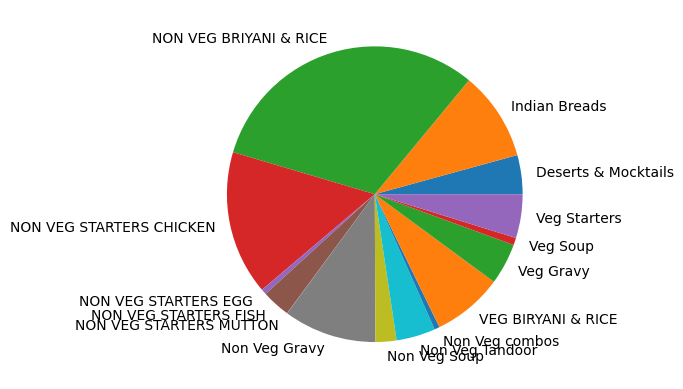

In [159]:
# Pie chart for sales
categories = df.groupby('Category')['Final Total'].sum()
print(categories)
plt.pie(categories, labels = categories.index)

In [151]:
# Average Order Value of the Restaurant
df['OV'] = df['Final Total'].sum()/len(df.groupby('Invoice No.'))
print(df['OV'].mean())

549.4027239654388
